In [1]:
from scipy.integrate import odeint as ode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dados dimensionais:

M = 20
m = 2 
R = 0.4
L = 0.4
g = 10
P = 2*(M+m)*g

# inclui o array parameters:

parameters = [M, m, R, L, g]

# dados do motor e dos mancais:

T0 = 10
k = 0.1
q = 1

# momentos de inércia e produtos de inércia

Jz = M*(R**2) + ((4*m*(L**2))/3)
Jyz = m*(L**2)

# condições iniciais

theta0 = 0
omega0 = 0.0
alfa0 = T0/Jz

y = [theta0, omega0]

# distância (G-A):

xg = 0
yg = (3*m*L)/(4*(M+m))
zg = (6*M*L + 3*m*L)/(4*(M+m))



In [3]:
# function torque de acionamento

def functionT(w):
  if w > (T0/k):
    return 0

  T = T0 - k*w
  return T

In [4]:
# function torque resistivo

def functionQ(w):
    
  Q = -q*w

  return Q

In [5]:
ay = []
parameters = [M, m, R, L, g, ay]

# Etapa 1

### e) Grafico w(t) e as reações em Y e Z no ponto A.

As equações abaixo:

Para a reação em A:

$$
    Y_{A} = 2(M+m)[g(1 - \frac{Z_{G}}{3L}) - Y_{G}((\dot{\theta})^2 cos\theta + \ddot{\theta}sin\theta)]
$$

e:


$$
    Z_{A} = 0
$$

Para a EDO:

$$
     \ddot{\theta} = \frac{T(\dot{\theta}) + Q(\dot{\theta}) + PY_{G}sin(\theta)}{J_{Z}}
$$

com:

$$
    T(\dot{\theta}) = T_{0} - wk
$$

e:
$$
    Q(\dot{\theta}) = -qw
$$

In [6]:
def function_omega(y, interval, parameters):

  ydot = [0, 0]

  ydot[0] = y[1]
  ydot[1] = (P*yg*np.sin(y[0]) + functionT(y[1]) + functionQ(y[1]))/(Jz)

  value = ((P/g)*(g*(1-(zg/(3*L))) - yg*((y[1]**2)*np.cos(y[0]) + ydot[1]*np.sin(y[0]))))

  ay.append(value)

  return ydot

In [7]:
# intervalo

ti = 0.
tf = 30
h = 0.01

interval = np.arange(ti, tf, h)

In [8]:
Y = ode(function_omega, y, interval, args=(parameters,))

In [9]:
Xn = Y[:, 0]
Vn = Y[:, 1]

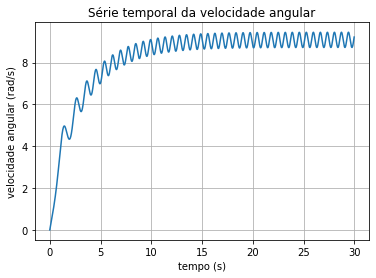

In [10]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

In [11]:
# intervalo

ti = 0.
tf = 27.07
h = 0.01

interval = np.arange(ti, tf, h)

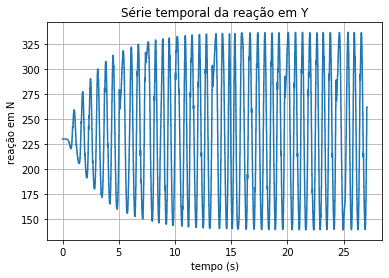

In [12]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

# Etapa 2

### h) Com o rotor desbalanceado, repita o item e) para T0 = 2,5

In [13]:
ay = []

In [14]:

T0 = 2.5

Y = ode(function_omega, y, interval, args=(parameters,))

In [15]:
Vn = Y[:, 1]

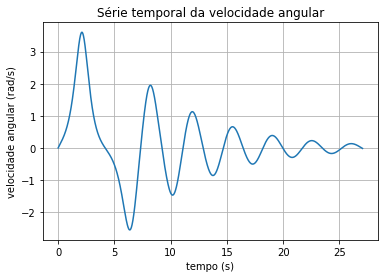

In [16]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

In [17]:
# intervalo

ti = 0.
tf = 9.97
h = 0.01

interval = np.arange(ti, tf, h)

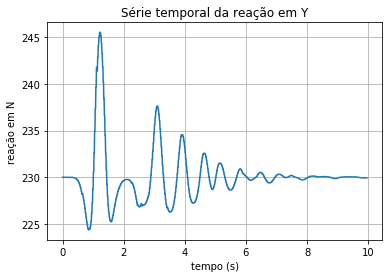

In [18]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

# Etapa 3

##### Para o rotor na posição vertical desbalanceado:

A EDO:

$$
    \ddot{\theta} = \frac{T(\dot{\theta}) + Q(\dot{\theta})}{Jz}
$$

As reações em A:

$$
    Y_{A} = 2(M+m)Y_{G}[(\frac{g}{3L} - \dot{\theta}^2)cos{\theta} - \ddot{\theta}sin{\theta}]
$$

e:
$$
    Z_{A} = P
$$

In [19]:
az = []
ay = []
T0 = 10

In [20]:
# intervalo

ti = 0.
tf = 30
h = 0.01

interval = np.arange(ti, tf, h)

In [21]:
def function_omega_vertical(y, interval, parameters):

    ydot = [0, 0]

    ydot[0] = y[1]
    ydot[1] = (functionT(y[1]) + functionQ(y[1]))/(Jz)

    valueY = ((P/g)*yg*((g/(3*L) - (y[1]**2))*np.cos(y[0]) - ydot[1]*np.sin(y[0])))
    valueZ = P
    ay.append(valueY)
    az.append(valueZ)

    return ydot

In [22]:
Y = ode(function_omega_vertical, y, interval, args=(parameters,))

In [23]:
Vn = Y[:, 1]

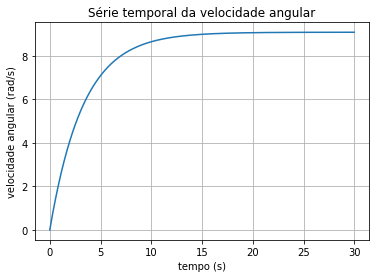

In [24]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

In [25]:
# intervalo

ti = 0.
tf = 1.51
h = 0.01

interval = np.arange(ti, tf, h)

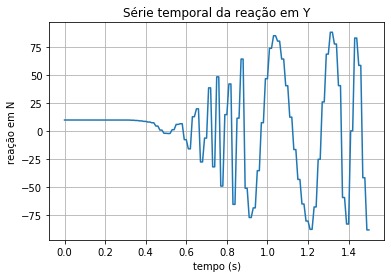

In [26]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

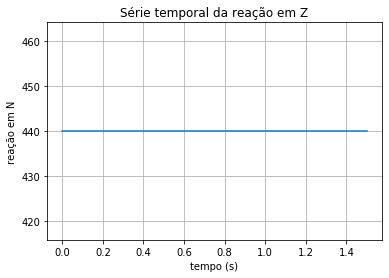

In [27]:
plt.plot(interval, az)
plt.title("Série temporal da reação em Z")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

# Etapa 2

### f) e g) Repita o item e) com o rotor balanceado:

In [28]:
# para o rotor balanceado:

m1 = (7*m*L)/(6*R)
m2 = (m*L)/(3*R)

P = P + (11*m*L)/(6*R) + (m*L)/(3*R)
yg = 0
Jz = (M + m1 + m2)*(R**2) + ((4*m*(L**2))/3)

In [29]:
# intervalo

ti = 0.
tf = 30
h = 0.01

interval = np.arange(ti, tf, h)

In [30]:
ay = []

In [31]:
Y = ode(function_omega, y, interval, args=(parameters,))

In [32]:
Xn = Y[:, 0]
Vn = Y[:, 1]

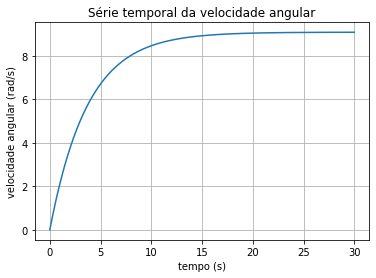

In [33]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

In [34]:
# intervalo

ti = 0.
tf = 1.43
h = 0.01

interval = np.arange(ti, tf, h)

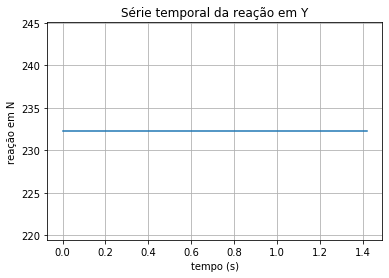

In [35]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()